# Dogs and cats sample data file 정리

In [1]:
import cv2, os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-01-23 05:22:57--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.188.208, 142.251.33.208, 172.217.15.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.188.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   142MB/s    in 0.5s    

2022-01-23 05:22:57 (142 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
!unzip cats_and_dogs_filtered.zip > /dev/null

In [5]:
# 이미지를 축소/확대 및 센터링해서 이미지를 리턴하는 함수
IMAGE_SIZE = 150

def center_image(img):
    """입력 img 포맷은 Pillow image, 반환 포맷은 numpy array"""
    h, w, _ = np.array(img).shape
    if h > w:
        width, height = IMAGE_SIZE, (h * IMAGE_SIZE) // w
    else:
        width, height = (w * IMAGE_SIZE) // h, IMAGE_SIZE

    new_img = np.array(img.resize((width,height)))

    diff = abs(width - height)//2
    if width > height:
        final_img = new_img[:, diff:diff+IMAGE_SIZE, :]
    else:
        final_img = new_img[diff:diff+IMAGE_SIZE, :, :]

    return final_img

In [6]:
CENTER_DIR = 'cats_and_dogs_centered'
if not os.path.exists(CENTER_DIR):
    os.mkdir(CENTER_DIR)


In [7]:
CENTER_DIR = 'cats_and_dogs_centered'
train_dir = f'{CENTER_DIR}/train'
validation_dir = f'{CENTER_DIR}/validation'
train_cats_dir = f'{CENTER_DIR}/train/cats'
train_dogs_dir = f'{CENTER_DIR}/train/dogs'
validation_cats_dir = f'{CENTER_DIR}/validation/cats'
validation_dogs_dir = f'{CENTER_DIR}/validation/dogs'

In [8]:
if not os.path.exists(CENTER_DIR):
    os.mkdir(CENTER_DIR)
for dir in [train_dir,validation_dir,train_cats_dir,train_dogs_dir,validation_cats_dir,validation_dogs_dir]:
    os.mkdir(dir)

In [9]:
old_train_dir = f'cats_and_dogs_filtered/train'
old_validation_dir = f'cats_and_dogs_filtered/validation'
old_train_cats_dir = f'cats_and_dogs_filtered/train/cats'
old_train_dogs_dir = f'cats_and_dogs_filtered/train/dogs'
old_validation_cats_dir = f'cats_and_dogs_filtered/validation/cats'
old_validation_dogs_dir = f'cats_and_dogs_filtered/validation/dogs'

In [10]:
# cats_and_dogs_filtered - > image 축소/ 확대 후 centering -> cats_and_dogs_centered
from glob import glob
for src_dir in [old_train_cats_dir,old_train_dogs_dir,old_validation_cats_dir,old_validation_dogs_dir]:
    dst_dir = src_dir.split('/')[1:]    # cats_and_dogs_filtered 제거
    dst_dir = '/'.join([CENTER_DIR] + dst_dir)  # CENTER_DIR 밑에 오는 디렉토리 지정
    for fname in glob(f'{src_dir}/*.jpg'):  
        dst_fname = fname.split('/')[-1]    # 예를 들어, cat.475.jpg
        src_img = Image.open(fname)         # 사이즈가 제각각인 이미지
        dst_img = center_image(src_img)     # 150 x 150으로 centering된 이미지(numpy)
        pil_img = Image.fromarray(dst_img)  # numpy array를 PIL 이미지로 변환
        pil_img.save(f'{dst_dir}/{dst_fname}')


In [12]:
# 파일 갯수 확인
len(os.listdir(train_cats_dir))

1000

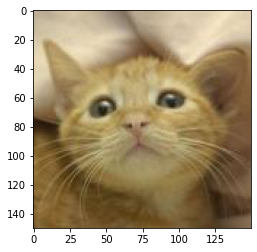

In [11]:
# 이미지 확인
img = Image.open(f'{train_cats_dir}/cat.475.jpg')
plt.imshow(img);